# A Simple Method for Melodic Analysis and Classification

Sorbonne Universités / Universités Pierre et Marie Curie et Paris Sorbonne

June 10-11-12, 2015 Paris, France

# Introduction : Aims and general approach

* To « analyse » and classify a big number of melodies
* Analysis from audio files (no symbolic data)
* A classification based on the scale proximity
* Toward an unsupervised approach (not a template-match approch)
* A simple method ?
* A Python Module : Diastema (https://github.com/AnasGhrab/diastema)

In [1]:
%matplotlib inline
from diastema import *
from IPython.display import Audio

# Step 1 : Fondamental frequency (f0) detection

* Praat
* PitchYinFFT (Essentia)
* PredominantMelody (Essentia)

In [2]:
path = "/Users/anas/AUDIO/quatre_chants/"
Chants = Melodies(path,transpose="No",xmin=250,xmax=500,minFrequency=0,maxFrequency=700)

Lecture et analyse de  4  fichiers (.txt) dans le dossier : /Users/anas/AUDIO/quatre_chants/
Ghom_11.txt (not transposed)
Guerm_16.txt (not transposed)
TataGhom_017.txt (not transposed)
TataGhom_018.txt (not transposed)


In [3]:
Audio(filename=path+Chants.melodies[0].file_label+".wav")

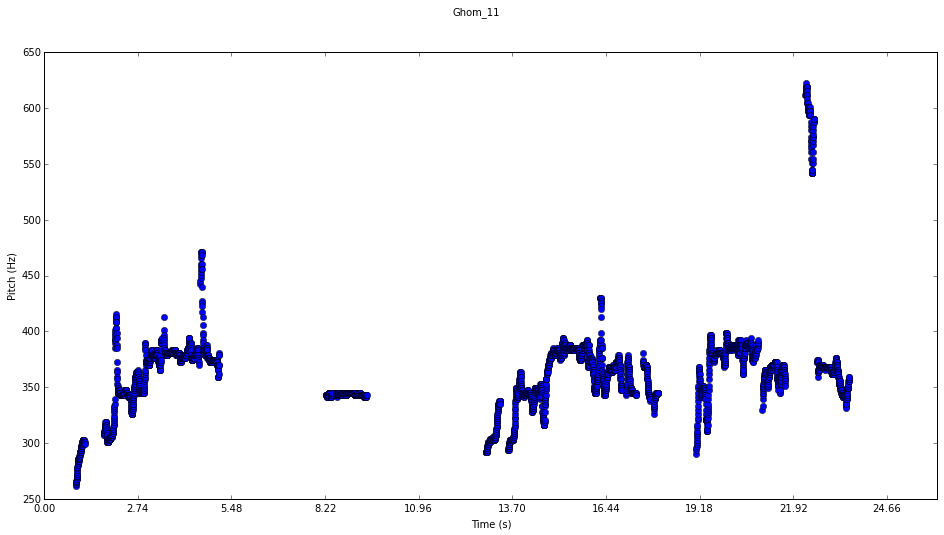

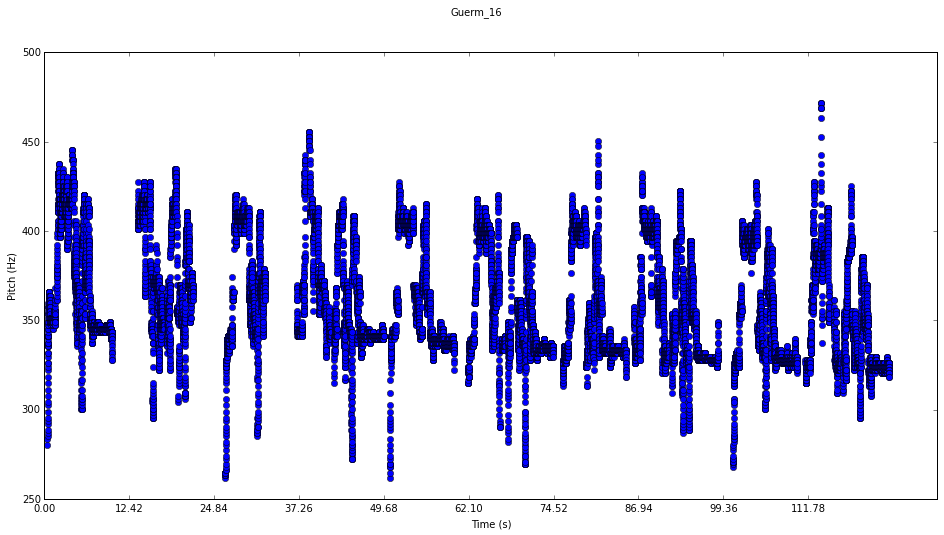

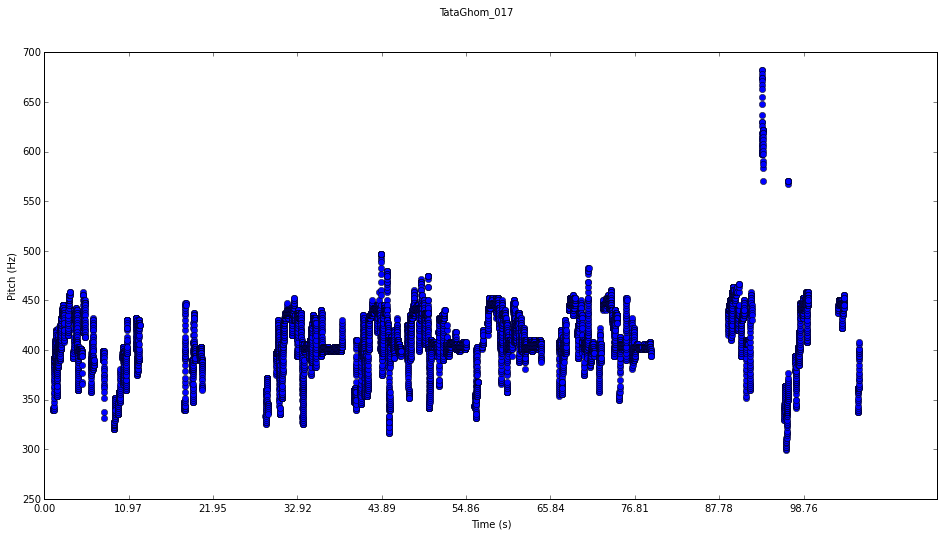

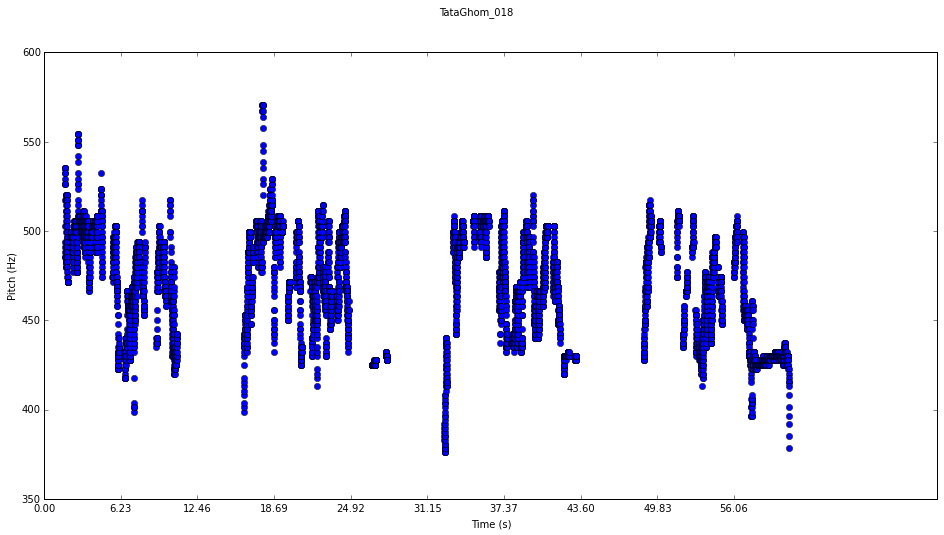

In [4]:
for i in range(0,len(Chants.melodies)):
    Chants.melodies[i].plot()

# Step 2 : Frequency Density Estimation

* The main notes of the melody correspond to a high density of the frequencies. These can be represented by a Probability Density Function (PDF)
* A way to estimate PDF is using a Kernel Density Estimation (Gaussian Kernels : http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.gaussian_kde.html)

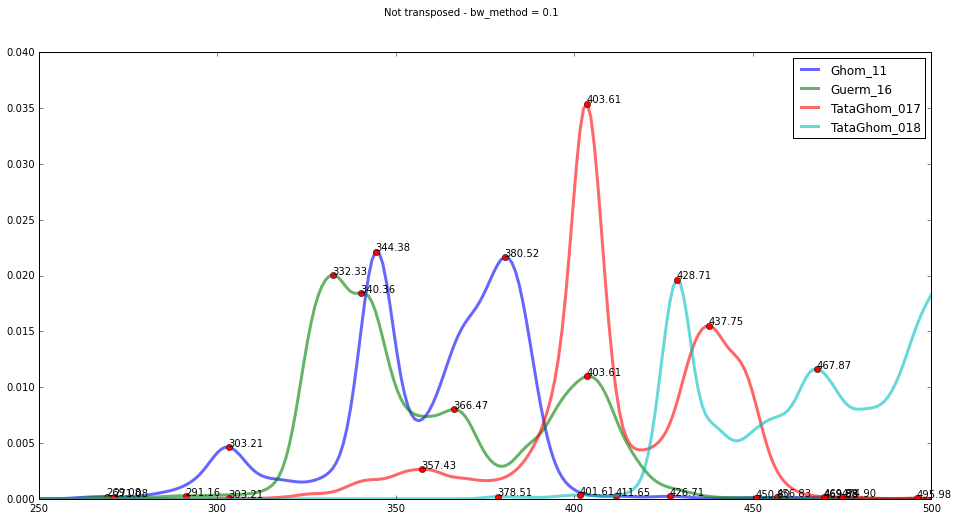

In [5]:
Chants.PdfsPlot(allplots="Yes",gpdf="No")

Lecture et analyse de  4  fichiers (.txt) dans le dossier : /Users/anas/AUDIO/quatre_chants/
Ghom_11.txt (not transposed)
Guerm_16.txt (not transposed)
TataGhom_017.txt (not transposed)
TataGhom_018.txt (not transposed)


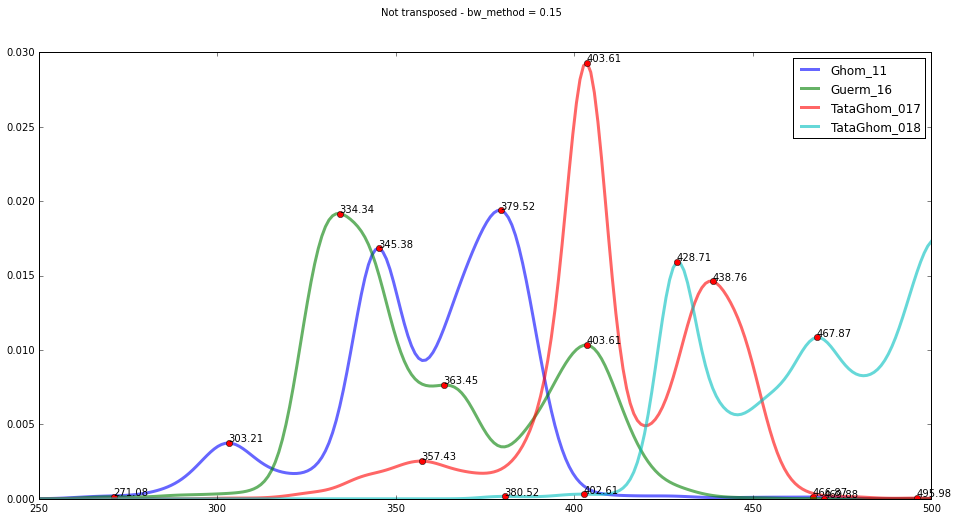

In [6]:
Chants = Melodies(path,transpose="No",xmin=250,xmax=500,minFrequency=0,maxFrequency=700,bw_method=0.15)
Chants.PdfsPlot(allplots="Yes",gpdf="No")

# Step 3 : Tonic detection

* Extract the last frequencies (0.5%, 1%, 1.5%)
* The tonic can be :
    * the most present frequency : _mode()_
    * The most probable frequency : KDE->PDF

In [7]:
Chants.AllTonics([0.5,1,1.5,2,5,15],method="pdf")

Toniques possibles de la Phrase Ghom_11  :  [349, 342, 342, 343, 366, 362]
Toniques possibles de la Phrase Guerm_16  :  [324, 324, 324, 324, 324, 326]
Toniques possibles de la Phrase TataGhom_017  :  [449, 445, 446, 447, 446, 445]
Toniques possibles de la Phrase TataGhom_018  :  [428, 428, 429, 428, 429, 428]


In [8]:
Chants.AllTonics([0.5,1,1.5,2,5,15],method="mode")

Toniques possibles de la Phrase Ghom_11  :  [349, 349, 343, 343, 367, 367]
Toniques possibles de la Phrase Guerm_16  :  [323, 323, 323, 323, 323, 323]
Toniques possibles de la Phrase TataGhom_017  :  [450, 445, 450, 447, 447, 403]
Toniques possibles de la Phrase TataGhom_018  :  [429, 429, 429, 427, 429, 429]


# Step 3bis (optional) : Getting the scale based of the detected tonic

In [10]:
for i in range(0,len(Chants.melodies)):
    print Chants.melodies[i].get_intervals(percent=0.5,method="pdf",unit="savart")

[  36.407    -4.5263  -61.0778  126.3682]
[  13.6399   95.4217   49.9042  -77.4406  161.4415]
[-46.2796 -10.0242 -99.0557  43.2213]
[  0.7248  38.6828 -26.5587 -51.0639]


In [11]:
for i in range(0,len(Chants.melodies)):
    print Chants.melodies[i].get_intervals(percent=0.5,method="mode",unit="savart")

[  36.407    -4.5263  -61.0778  126.3682]
[  14.9824   96.7642   51.2467  -76.0981  162.784 ]
[ -47.2458  -10.9904 -100.0219   42.2551]
[ -0.2888  37.6693 -27.5723 -52.0774]


# Step 4 : Correlation / Distances

In [8]:
data_dist = Chants.PdfCorr()
data_link = linkage(data_dist) # computing the linkage

# Step 5 Hierarchical Clustering

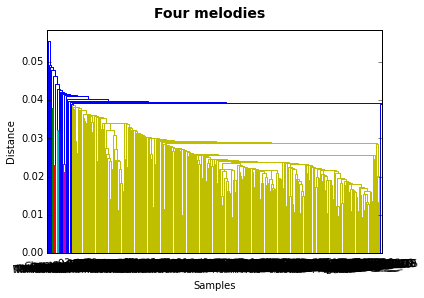

In [9]:
dendrogram(data_link,labels=Chants.file_names)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.suptitle('Four melodies', fontweight='bold', fontsize=14);

# Step 6 : Similarity matrix / Heatmap

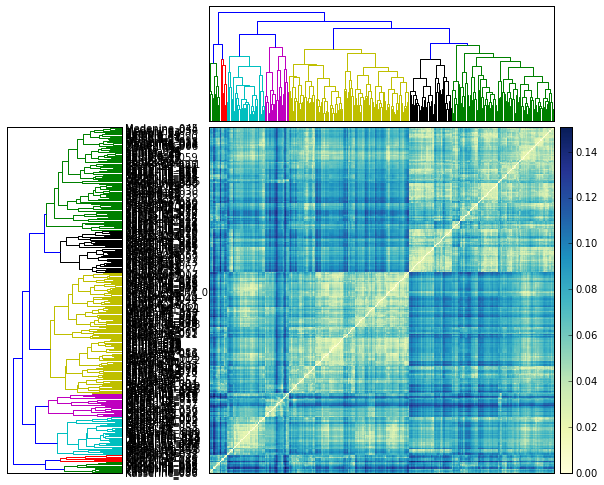

In [10]:
# As explained here : http://nbviewer.ipython.org/github/OxanaSachenkova/hclust-python/blob/master/hclust.ipynb
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = linkage(data_dist, method='complete')
Z1 = dendrogram(Y, orientation='right',labels=Chants.file_names) # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.4,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.4,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([1.01,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor);

# Toward a clustering of traditional woman songs in Tunisia (309 songs)

In [3]:
path = "/Users/anas/AUDIO/Chants_femmes/"
Chants = Melodies(path,transpose="Yes")

Lecture et analyse de  309  fichiers (.txt) dans le dossier : /Users/anas/AUDIO/Chants_femmes/
Bembla_01.txt (transposed)
Bembla_02.txt (transposed)
Bembla_03.txt (transposed)
Bembla_04.txt (transposed)
Bembla_05.txt (transposed)
Bembla_06.txt (transposed)
Bembla_07.txt (transposed)
Bembla_08.txt (transposed)
Bembla_09.txt (transposed)
Bembla_10.txt (transposed)
Bembla_11.txt (transposed)
Bembla_12.txt (transposed)
Bembla_13.txt (transposed)
Bembla_14.txt (transposed)
Bembla_15.txt (transposed)
Bembla_16.txt (transposed)
Bembla_17.txt (transposed)
Bembla_18.txt (transposed)
Bembla_19.txt (transposed)
Bembla_20.txt (transposed)
Bembla_21.txt (transposed)
Bembla_22.txt (transposed)
Bembla_23.txt (transposed)
Bembla_24.txt (transposed)
Bembla_25.txt (transposed)
Bembla_26.txt (transposed)
Bembla_27.txt (transposed)
Bembla_28.txt (transposed)
Bembla_29.txt (transposed)
Bembla_30.txt (transposed)
Bembla_31.txt (transposed)
Bembla_32.txt (transposed)
Bembla_33.txt (transposed)
Bembla_34.txt 

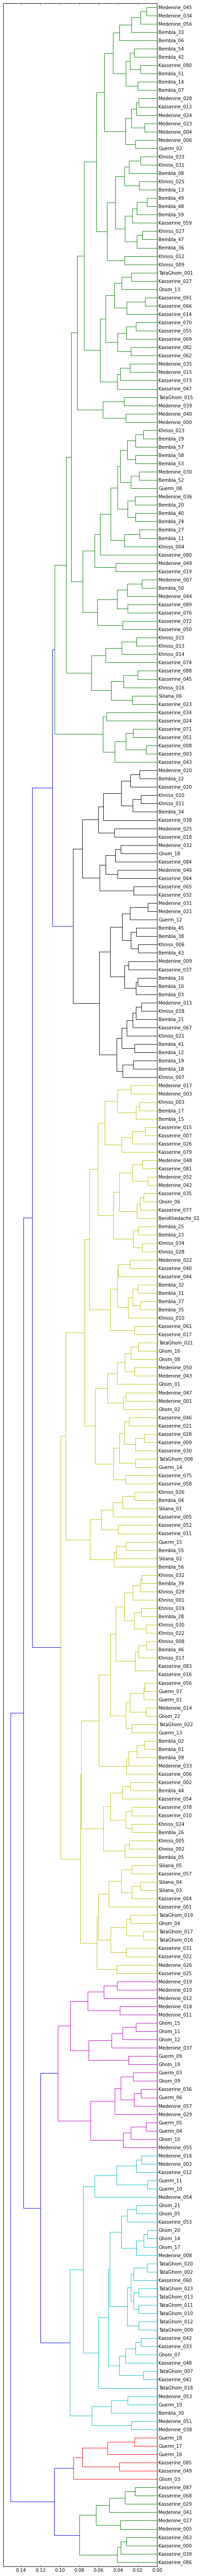

In [11]:
# As explained here : http://nbviewer.ipython.org/github/OxanaSachenkova/hclust-python/blob/master/hclust.ipynb
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(6,100))
# x ywidth height
#ax1 = fig.add_axes([1,1,3,3])
Y = linkage(Chants.PdfCorr(),method='complete')
Z1 = dendrogram(Y, orientation='right',labels=Chants.file_names) # adding/removing the axes
ax1.set_xticks([]);

In [16]:
for i in range(0,len(Chants.melodies)):
    print i, Chants.melodies[i].file_label

0 Bembla_01
1 Bembla_02
2 Bembla_03
3 Bembla_04
4 Bembla_05
5 Bembla_06
6 Bembla_07
7 Bembla_08
8 Bembla_09
9 Bembla_10
10 Bembla_11
11 Bembla_12
12 Bembla_13
13 Bembla_14
14 Bembla_15
15 Bembla_16
16 Bembla_17
17 Bembla_18
18 Bembla_19
19 Bembla_20
20 Bembla_21
21 Bembla_22
22 Bembla_23
23 Bembla_24
24 Bembla_25
25 Bembla_26
26 Bembla_27
27 Bembla_28
28 Bembla_29
29 Bembla_30
30 Bembla_31
31 Bembla_32
32 Bembla_33
33 Bembla_34
34 Bembla_35
35 Bembla_36
36 Bembla_37
37 Bembla_38
38 Bembla_39
39 Bembla_40
40 Bembla_41
41 Bembla_42
42 Bembla_43
43 Bembla_44
44 Bembla_45
45 Bembla_46
46 Bembla_47
47 Bembla_48
48 Bembla_49
49 Bembla_50
50 Bembla_51
51 Bembla_52
52 Bembla_53
53 Bembla_54
54 Bembla_55
55 Bembla_56
56 Bembla_57
57 Bembla_58
58 Bembla_59
59 BeniKhedache_01
60 Ghom_01
61 Ghom_02
62 Ghom_03
63 Ghom_04
64 Ghom_05
65 Ghom_06
66 Ghom_07
67 Ghom_08
68 Ghom_09
69 Ghom_10
70 Ghom_11
71 Ghom_12
72 Ghom_13
73 Ghom_14
74 Ghom_15
75 Ghom_16
76 Ghom_17
77 Ghom_18
78 Ghom_19
79 Ghom_20
80 G

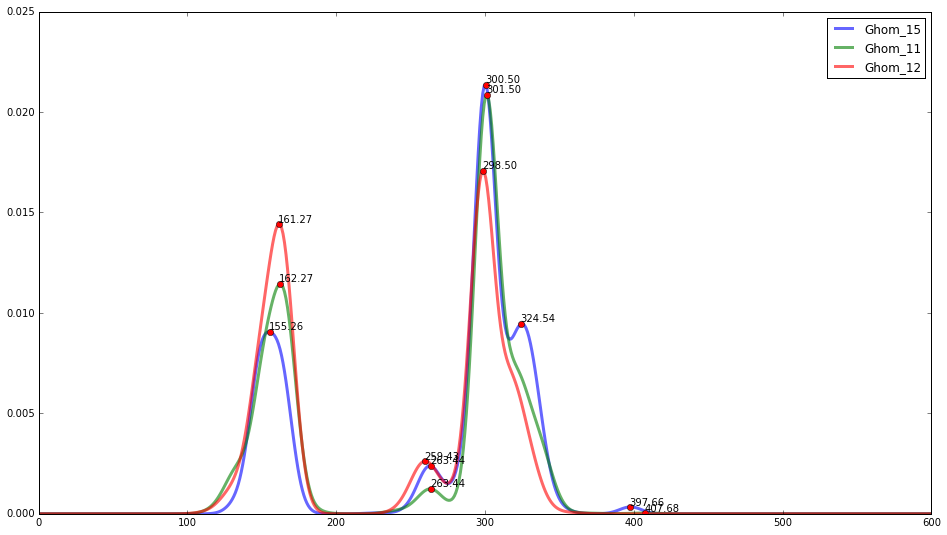

In [25]:
plt.figure(figsize=(16,9))
Chants.melodies[74].pdf_show() # Ghom_15
Chants.melodies[70].pdf_show() # Ghom_11
Chants.melodies[71].pdf_show() # Ghom_12

# Links

* Diastema : Diastema (https://github.com/AnasGhrab/diastema)
* Salamon, Justin, and Emilia Gómez. “Melody Extraction from Polyphonic Music Signals Using Pitch Contour Characteristics.” Audio, Speech, and Language Processing, IEEE Transactions on 20, no. 6 (2012): 1759–70. (see also Melody Extraction : http://www.justinsalamon.com/melody-extraction.html)
* Heatmap with Python : http://nbviewer.ipython.org/github/OxanaSachenkova/hclust-python/blob/master/hclust.ipynb
* Extract Cluster Elements by Color in Python Dendrograms : http://nxn.se/post/90198924975/extract-cluster-elements-by-color-in-python
* http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html